# **Project Name**    - Project Name - Uber Supply Demand Gap Analysis




##### **Project Type**    - Exploratory Data Analysis (EDA)
##### **Contribution**    - Individual
##### **Team Member 1 - GANGARAPU DATHA NAGA SAI
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# display settings
pd.set_option('display.max_columns', None)

# load dataset
df = pd.read_csv('Uber Request Data.csv')

# preview data
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [3]:
df.columns


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [4]:
df.shape


(6745, 6)

In [5]:
df.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
df_clean = df.copy()


In [7]:
df_clean['Request timestamp'] = pd.to_datetime(
    df_clean['Request timestamp'], 
    errors='coerce', 
    dayfirst=True
)

df_clean['Drop timestamp'] = pd.to_datetime(
    df_clean['Drop timestamp'], 
    errors='coerce', 
    dayfirst=True
)


In [8]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  2674 non-null   datetime64[ns]
 5   Drop timestamp     1150 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [9]:
df_clean['Request_hour'] = df_clean['Request timestamp'].dt.hour


In [10]:
df_clean[['Request timestamp', 'Request_hour']].head()


,Request timestamp,Request_hour
0,2016-07-11 11:51:00,11.0
1,2016-07-11 17:57:00,17.0
2,2016-07-12 09:17:00,9.0
3,2016-07-12 21:08:00,21.0
4,NaT,NaN


In [11]:
def time_slot(hour):
    if pd.isna(hour):
        return np.nan
    elif 0 <= hour < 5:
        return 'Early Morning'
    elif 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'

df_clean['Time_slot'] = df_clean['Request_hour'].apply(time_slot)


In [12]:
df_clean[['Request_hour', 'Time_slot']].head(10)


,Request_hour,Time_slot
0,11.0,Afternoon
1,17.0,Evening
2,9.0,Morning
3,21.0,Night
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,6.0,Morning


In [13]:
time_slot_counts = df_clean['Time_slot'].value_counts()
time_slot_counts


Time_slot
Morning          841
Evening          637
Night            555
Afternoon        438
Early Morning    203
Name: count, dtype: int64

In [14]:
df_clean['Status'].value_counts()


Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [15]:
status_time_slot = pd.crosstab(df_clean['Time_slot'], df_clean['Status'])
status_time_slot


Status,Cancelled,No Cars Available,Trip Completed
Time_slot,,,
Afternoon,69,96,273
Early Morning,21,105,77
Evening,42,359,236
Morning,323,158,360
Night,47,291,217


In [16]:
df_clean['Pickup point'].value_counts()


Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [17]:
pickup_status = pd.crosstab(df_clean['Pickup point'], df_clean['Status'])
pickup_status


Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


In [18]:
time_pickup_status = pd.crosstab(
    [df_clean['Time_slot'], df_clean['Pickup point']],
    df_clean['Status']
)
time_pickup_status


Status                      Cancelled  No Cars Available  Trip Completed
Time_slot     Pickup point                                              
Afternoon     Airport              20                 36             132
              City                 49                 60             141
Early Morning Airport               0                 56              41
              City                 21                 49              36
Evening       Airport              26                331             118
              City                 16                 28             118
Morning       Airport              13                 10             177
              City                310                148             183
Night         Airport              28                255             102
              City                 19                 36             115

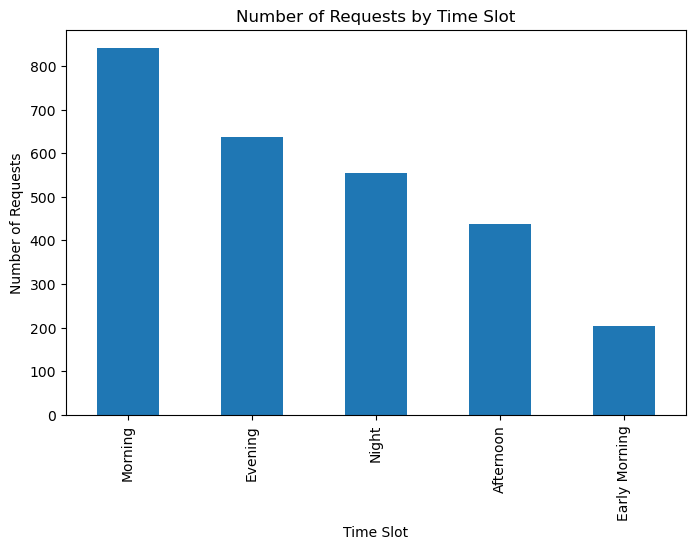

In [19]:
plt.figure(figsize=(8,5))
time_slot_counts.plot(kind='bar')
plt.title('Number of Requests by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.show()


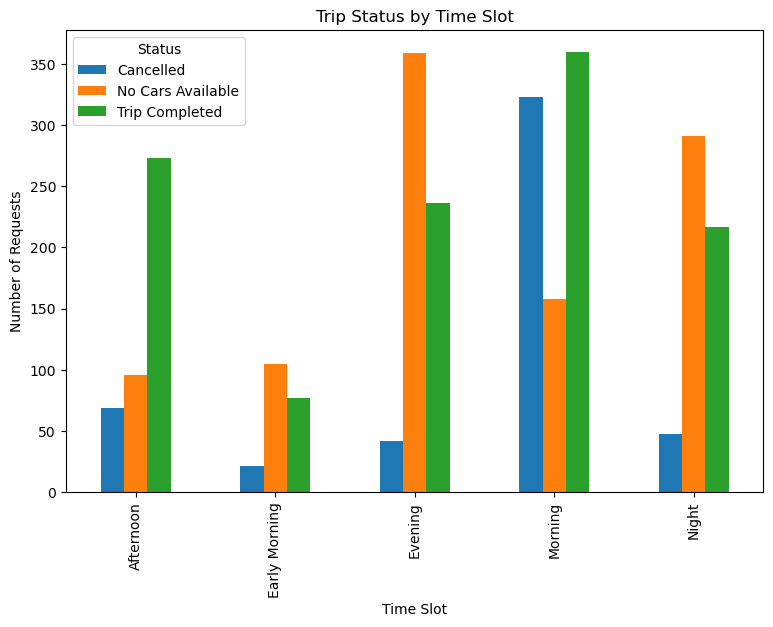

In [20]:
status_time_slot.plot(kind='bar', figsize=(9,6))
plt.title('Trip Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.show()


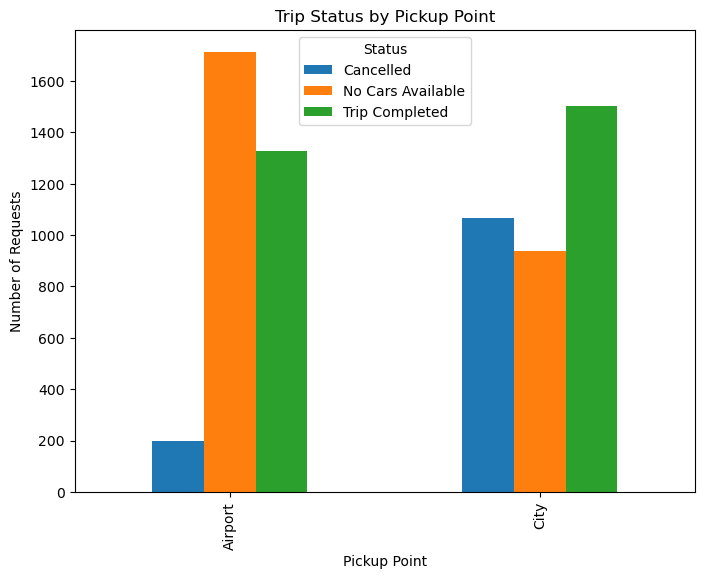

In [21]:
pickup_status.plot(kind='bar', figsize=(8,6))
plt.title('Trip Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()


# **Project Summary -**

This project focuses on analyzing the supply-demand gap in Uber ride requests using exploratory data analysis techniques. The dataset contains information about ride requests, pickup points, trip status, and timestamps. The primary objective of this analysis is to identify patterns and reasons behind trip failures such as cancellations and unavailability of cars.

The analysis begins with data cleaning and preprocessing. Missing values were identified in the Driver ID and Drop Timestamp columns. These missing values are meaningful, as they indicate cancelled trips or situations where cars were not available. Timestamp columns were converted into datetime format to allow time-based analysis. Additional features such as request hour and time slots were created to understand demand variations across different times of the day.

Exploratory data analysis revealed that ride demand is highest during morning hours, followed by evening and night periods. Early morning shows comparatively lower demand. However, demand alone does not explain the problem. A significant number of trips fail due to either driver cancellations or unavailability of cars.

Further analysis of trip status showed that a large number of requests fail because no cars are available, especially during evening and night hours. Morning hours experience a high number of cancellations, indicating driver-side issues during peak traffic hours. Pickup point analysis revealed that airport rides suffer mainly from car unavailability, while city rides face higher cancellation rates.

A combined analysis of time slots and pickup points clearly highlights that Uber faces both time-based and location-based supply challenges. Evening and night airport rides are affected due to lack of cars, while morning city rides experience frequent cancellations. These insights indicate that the supply-demand gap is driven more by supply-side constraints rather than lack of customer demand.

The findings of this project can help Uber improve driver allocation strategies, increase incentives during peak hours, and ensure better availability of cars at airports and during high-demand periods. This analysis provides actionable insights that can improve operational efficiency and customer satisfaction.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to analyze Uber ride request data to identify the key factors contributing to the supply-demand gap. The analysis aims to understand when and where ride requests fail due to cancellations or unavailability of cars, and to provide data-driven insights to improve Uber’s operational efficiency.
*

#### **Define Your Business Objective?**

Answer Here.
The business objective is to identify peak demand periods and locations where Uber faces supply shortages or high cancellation rates, and to suggest improvements in driver allocation and availability to reduce trip failures.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [22]:
# Import Libraries

### Dataset Loading

In [23]:
# Load Dataset

### Dataset First View

In [24]:
# Dataset First Look

### Dataset Rows & Columns count

In [25]:
# Dataset Rows & Columns count

### Dataset Information

In [26]:
# Dataset Info

#### Duplicate Values

In [27]:
# Dataset Duplicate Value Count

#### Missing Values/Null Values

In [28]:
# Missing Values/Null Values Count

In [29]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [30]:
# Dataset Columns

In [31]:
# Dataset Describe

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [32]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [33]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

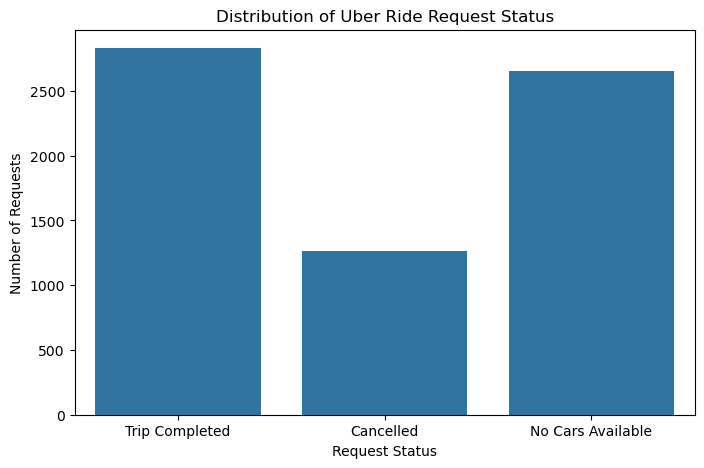

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Status')

plt.title('Distribution of Uber Ride Request Status')
plt.xlabel('Request Status')
plt.ylabel('Number of Requests')

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that a significant number of ride requests do not result in successful trips.
Among the failed requests, "No Cars Available" contributes more than cancellations.
This indicates that supply shortage is a bigger issue than user-driven cancellations.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, the insights help create a positive business impact by clearly identifying supply
shortages as the main reason for trip failures. Addressing driver availability can
significantly improve trip completion rates.

However, the high number of failed requests due to no car availability highlights a
negative growth factor, as unmet demand can lead to customer dissatisfaction and loss
of potential revenue.


#### Chart - 2

In [35]:
df.columns


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

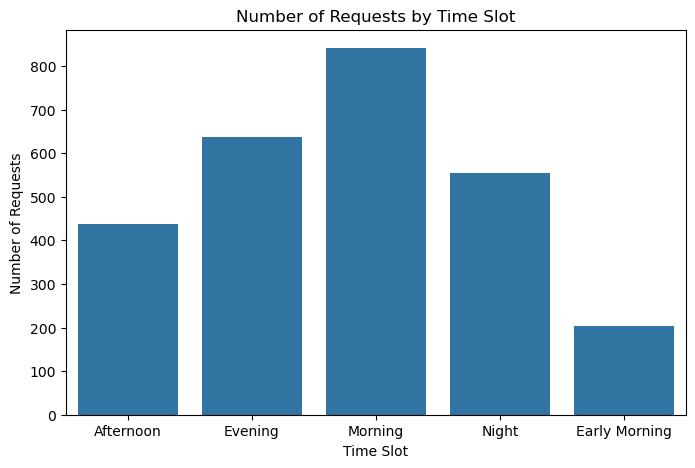

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='Time_slot')

plt.title('Number of Requests by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')

plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

This chart helps understand how Uber ride requests are distributed across different time slots during the day, identifying peak demand periods.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that request volume is highest during Morning and Evening time slots, indicating peak demand periods. Early Morning has the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights help Uber plan driver availability during peak hours. However, high demand during peak slots can negatively impact customer experience if supply is insufficient.

#### Chart - 3

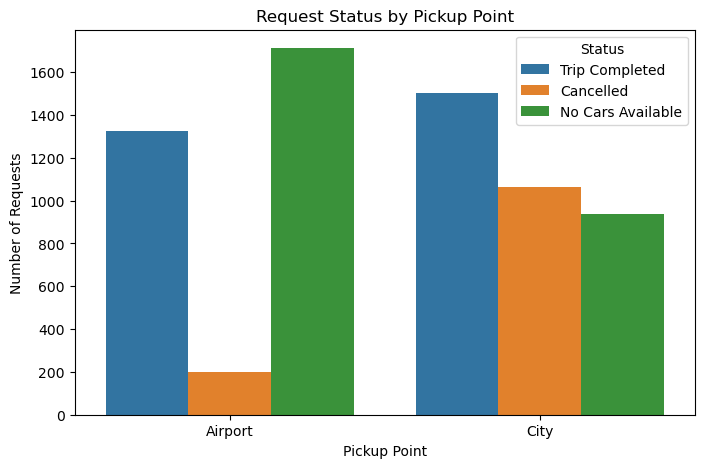

In [37]:
# Chart - 3 visualization code
plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='Pickup point', hue='Status')

plt.title('Request Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')

plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart was chosen to compare ride request outcomes across different pickup
points. It helps identify whether trip failures are more frequent at the
Airport or within the City.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that Airport requests have a higher number of failures due to
"No Cars Available", while City requests experience more cancellations.
This indicates location-based supply issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

These insights help Uber optimize driver allocation by location.
Improving car availability at airports can significantly reduce failed trips.
However, frequent city cancellations may negatively affect customer trust.


#### Chart - 4

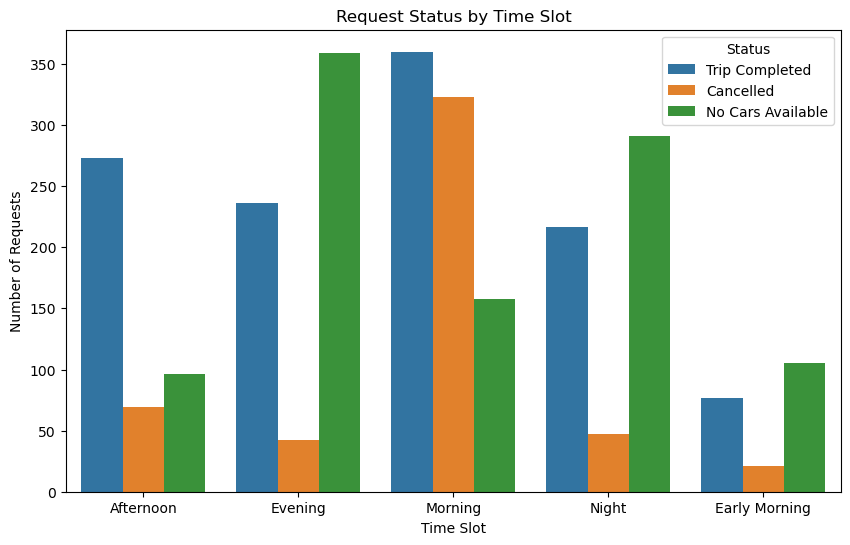

In [38]:
# Chart - 4: Request Status by Time Slot

plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='Time_slot', hue='Status')

plt.title('Request Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')

plt.legend(title='Status')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

This chart was chosen to analyze how Uber ride request outcomes vary across different time slots. It helps identify peak hours where cancellations or unavailability of cars are highest.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that Morning and Evening time slots have the highest number of requests. “No Cars Available” is especially high during Evening and Night hours, indicating strong demand but insufficient supply. Early Morning has the lowest demand and fewer failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

These insights help Uber plan better driver availability during peak hours, especially in the Evening and Night slots, improving trip completion rates. However, high failure rates during peak times can negatively impact customer satisfaction if supply issues are not addressed.

#### Chart - 5

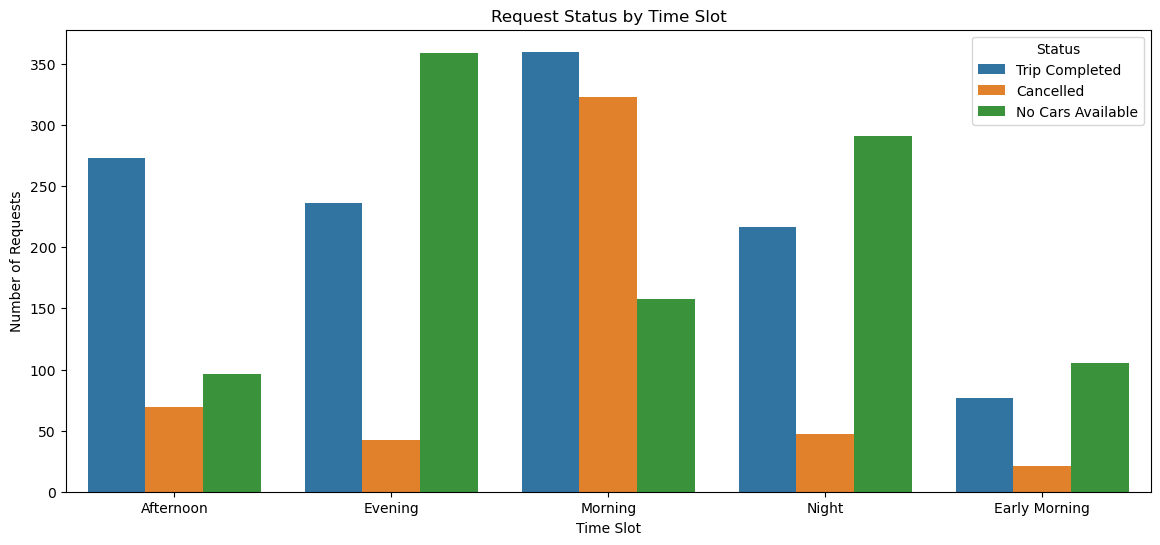

In [39]:
# Chart - 5 visualization code
plt.figure(figsize=(14,6))

sns.countplot(
    data=df_clean,
    x='Time_slot',
    hue='Status',
)

plt.title('Request Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Status')

plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

This chart was chosen to analyze how Uber ride request outcomes vary across different time slots. It helps identify peak periods where cancellations or unavailability of cars are highest, enabling time-based supply planning.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that Evening and Night time slots experience a high number of failed requests, mainly due to “No Cars Available”. Morning hours have higher completed trips but also notable cancellations, while Early Morning has the lowest overall demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights help Uber improve driver allocation by time slot. Increasing driver availability during Evening and Night hours can reduce unmet demand and improve customer satisfaction. However, continued shortages during peak times can negatively impact revenue and user trust if not addressed.

#### Chart - 6

In [40]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [41]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [42]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [43]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [44]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [45]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [46]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [47]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [48]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [49]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

To achieve the business objective, Uber should focus on improving driver availability during peak demand periods, especially during Evening and Night time slots and at Airport pickup points. Incentive-based driver scheduling, surge pricing during high-demand hours, and better demand forecasting can help reduce the number of failed requests due to unavailability of cars.

Additionally, improving driver engagement in city areas during morning peak hours can help reduce cancellations. These measures will improve trip completion rates, customer satisfaction, and overall revenue.


# **Conclusion**

Write the conclusion here.

This project analyzed Uber ride request data to understand the supply-demand gap using exploratory data analysis. The analysis revealed that demand is highest during Morning, Evening, and Night time slots, while a significant number of ride failures occur due to unavailability of cars rather than cancellations.

Airport pickup points suffer mainly from supply shortages, whereas city trips experience higher cancellations. These findings indicate that Uber’s supply-demand gap is driven by both time-based and location-based challenges. Addressing these issues through better driver allocation and demand forecasting can significantly improve operational efficiency and customer experience.


### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

In [50]:
df_clean.shape


(6745, 8)

In [52]:
excel_path = r'C:\Uber_Project_Labmentrix\3_Excel\Uber_Dashboard.xlsx'
df_clean.to_excel(excel_path, sheet_name='Cleaned_Data', index=False)


In [53]:
r'C:\Uber_Project_Labmentrix\3_Excel\Uber_Dashboard.xlsx'


'C:\\Uber_Project_Labmentrix\\3_Excel\\Uber_Dashboard.xlsx'